In [117]:
from scipy import signal as np_signal
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv', parse_dates=['time'], index_col='time')

In [11]:
df.head()

,airmiles
time,
1937-01-01,412
1938-01-01,480
1939-01-01,683
1940-01-01,1052
1941-01-01,1385


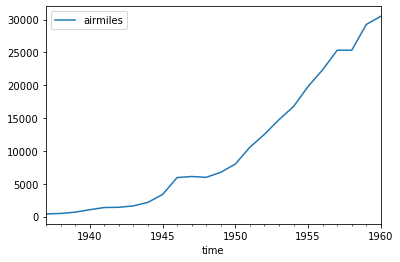

In [27]:
df.plot();

In [52]:
df['airmiles'].autocorr(lag=15)

0.9233376455323363

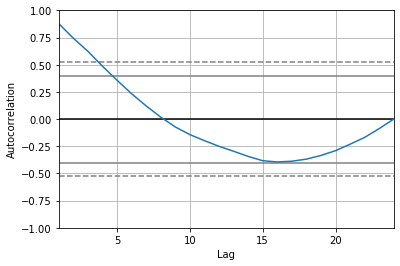

In [53]:
autocorrelation_plot(df['airmiles'])

In [78]:
x = np.linspace(-2*np.pi, np.pi, 24)
df_1 = pd.DataFrame(np.cos(x), index=df.index, columns=['values'])

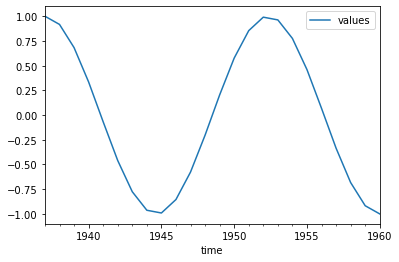

In [79]:
df_1.plot()

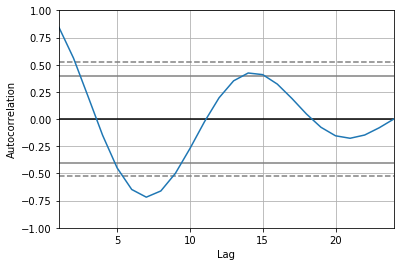

In [80]:
autocorrelation_plot(df_1)

### ARIMA

In [81]:
from statsmodels.tsa.arima_model import ARIMA

/home/witek/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [94]:
model = ARIMA(df, order=(3,1,0))

/home/witek/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/witek/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [95]:
model_fit = model.fit(disp=0)

In [96]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.airmiles   No. Observations:                   23
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -192.589
Method:                       css-mle   S.D. of innovations           1035.836
Date:                Tue, 08 Oct 2019   AIC                            395.178
Time:                        21:06:53   BIC                            400.856
Sample:                    01-01-1938   HQIC                           396.606
                         - 01-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1301.5884    487.542      2.670      0.015     346.024    2257.153
ar.L1.D.airmiles     0.1763      0.202      0.872      0.394      -0.220       0.573
ar.L2.D.airmiles     0.4481 

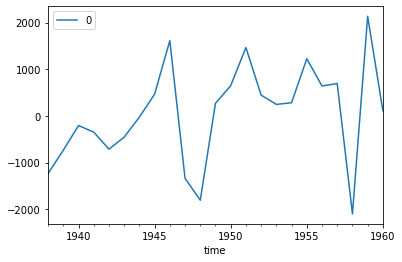

In [102]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

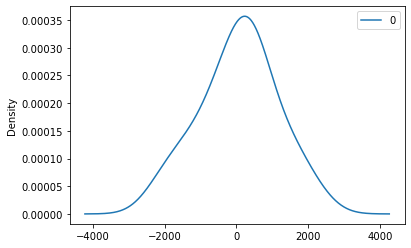

In [101]:
residuals.plot(kind='kde');

In [99]:
print(residuals.describe())

                 0
count    23.000000
mean     56.390236
std    1068.506860
min   -2100.582840
25%    -582.868425
50%     247.268837
75%     646.279911
max    2137.539020


### Forecasting

In [136]:
size = int(len(df.values) * 0.66)
train_data, test_data = df.values[0:size], df.values[size:len(df.values)]
history = [x for x in train_data]
predictions = list()

for t in range(len(test_data)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=11814.721230, expected=12528.000000
predicted=13343.539705, expected=14760.000000
predicted=16190.722185, expected=16769.000000
predicted=18248.248891, expected=19819.000000
predicted=22270.186932, expected=22362.000000
predicted=24433.912196, expected=25340.000000
predicted=27913.140683, expected=25343.000000
predicted=25830.143644, expected=29269.000000
predicted=30311.647795, expected=30514.000000


Test MSE: 2735390.887


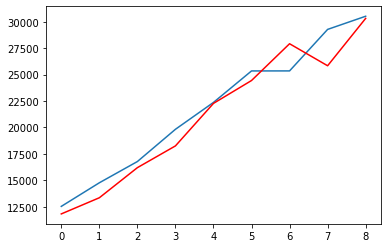

In [137]:
error = mean_squared_error(test_data, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()